In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy

## **Variable of transformation**

#### **1, 2, 3**

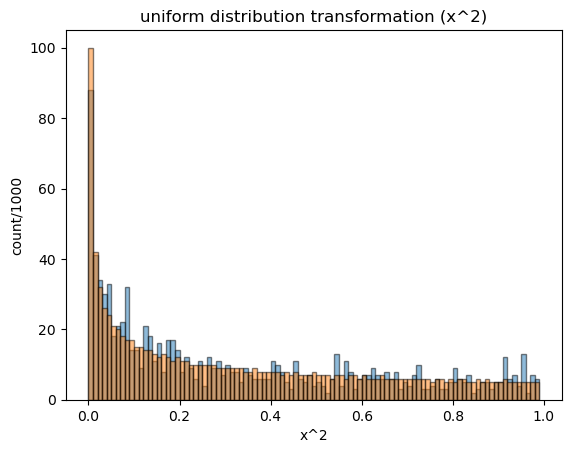

In [92]:
u_is = np.square(scipy.stats.uniform.rvs(size=1000))
plot.hist(u_is,density=False,edgecolor='black',alpha=.5,bins=np.arange(0,1,.01))

u_analytic = np.square(np.arange(0,1,.001))
plot.hist(u_analytic,density=False,edgecolor='black',alpha=.5,bins=np.arange(0,1,.01))
plot.xlabel("x^2")
plot.ylabel("count/1000")
plot.title("uniform distribution transformation (x^2)")
plot.show()

for analytic, simplest way is to iterate 0-1 with a step of 1/1000 (or really any step that's small enough), and then square the entire array. Basically just approximate how x^2 when x uniform distribution would bucket. This has a slight error but it doesn't really affect the overall shape for the sake of our comparison.

sampled matches overall shape of analytic but has some random deviations since sample size is so small.

#### **4: repeat 1,2,3 with $u=log(x)$**

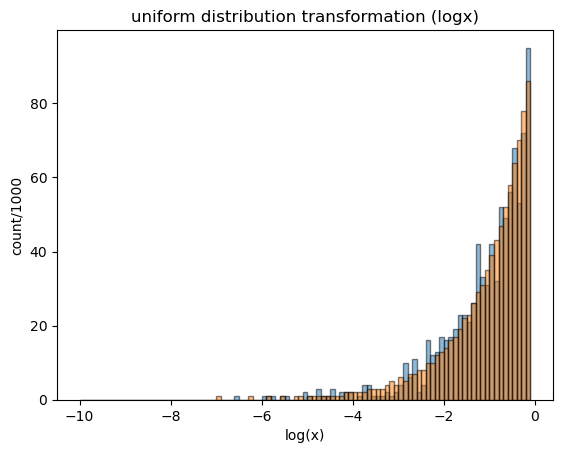

In [96]:
u_is = np.log(scipy.stats.uniform.rvs(size=1000))
u_analytic = np.log(np.arange(0.001,1.001,.001))
plot.hist(u_is,density=False,edgecolor='black',alpha=.5,bins=np.arange(-10,0,.1))
plot.hist(u_analytic,density=False,edgecolor='black',alpha=.5,bins=np.arange(-10,0,.1))
plot.xlabel("log(x)")
plot.ylabel("count/1000")
plot.title("uniform distribution transformation (logx)")
plot.show()

again, sampled has noticeable variance from analytic since sample size is so small

## **throwing two dice**

#### **1, 2, 3:**  distribution of 1000 double dice throws

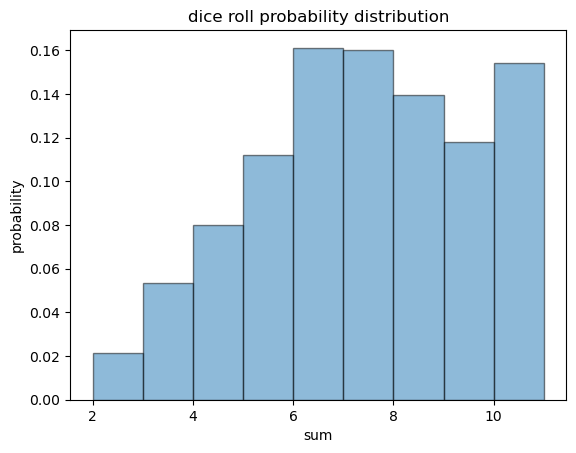

In [86]:
rolls1 = scipy.stats.uniform.rvs(size=1000)
rolls1 = np.ceil(rolls1*6)

rolls2 = scipy.stats.uniform.rvs(size=1000)
rolls2 = np.ceil(rolls2*6)

sum_rolls = rolls1+rolls2

plot.hist(sum_rolls,density=True,edgecolor='black',alpha=.5,bins=np.arange(2.0,12,1))
plot.xlabel("sum")
plot.ylabel("probability")
plot.title("dice roll probability distribution")
plot.show()

#### **4:** mean and variance

In [ ]:
mean = np.mean(sum_rolls)
var = np.var(sum_rolls)
print(f'mean= {mean}, var= {var}')

mean= 6.927, var= 6.001671000000002


#### **5:** probability of 7s

In [57]:
count_7s = np.count_nonzero(sum_rolls == 7)
P_7s = count_7s/1000
print(f'P(7)= {P_7s}')

P(7)= 0.176


#### **6:**
analytic probability of 7s is 1/6 (6 possibilities that result in 7 / 36 total possibilities). this lines up closely enough with the results from our 1000 dice rolls.

## **central limit theorem**

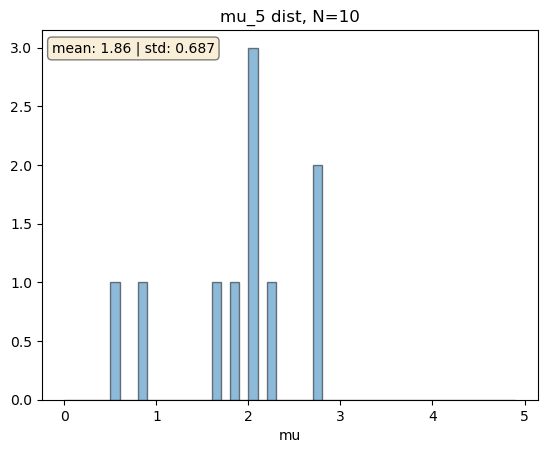

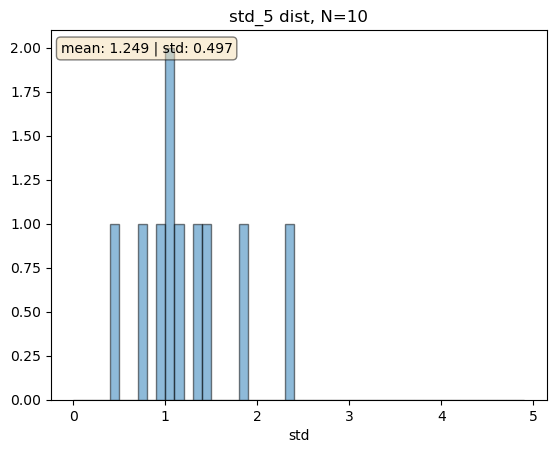

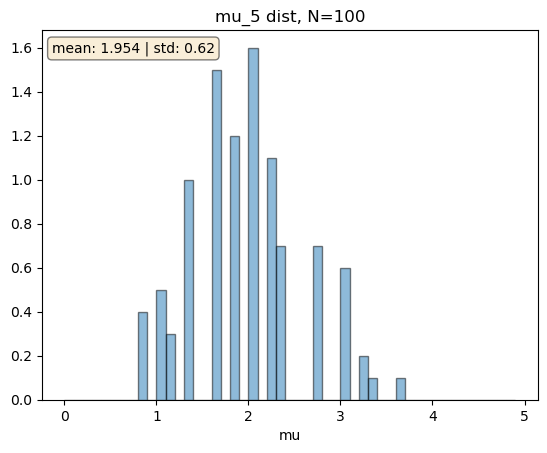

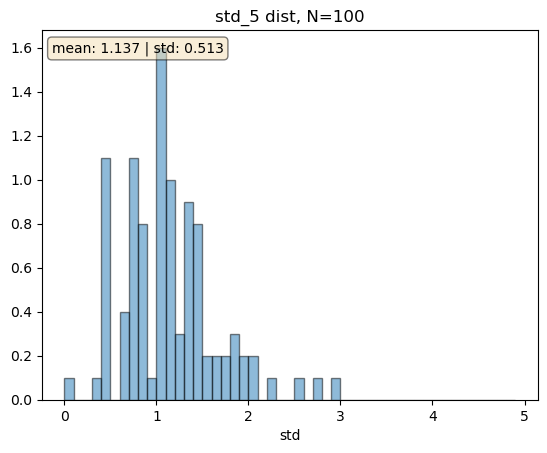

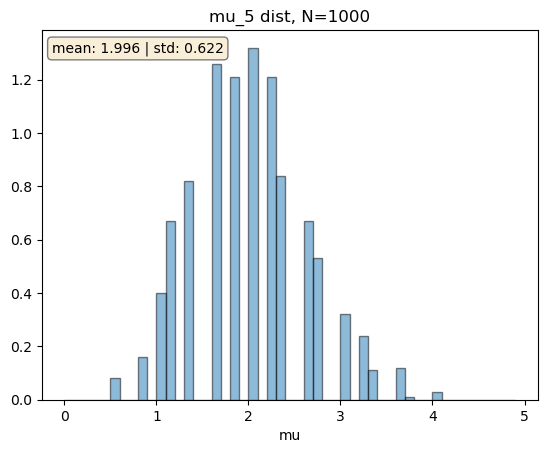

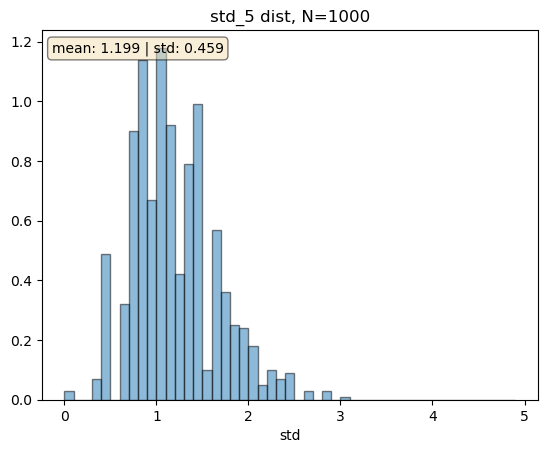

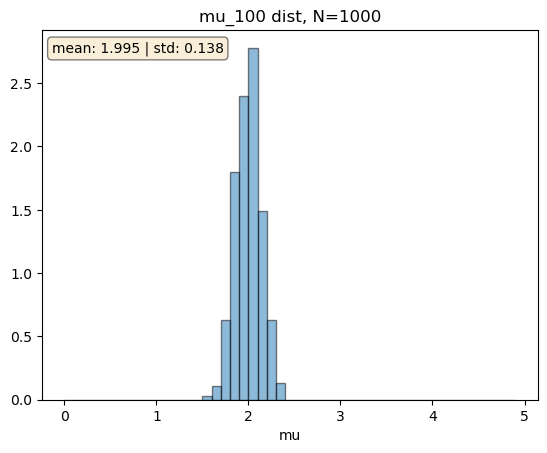

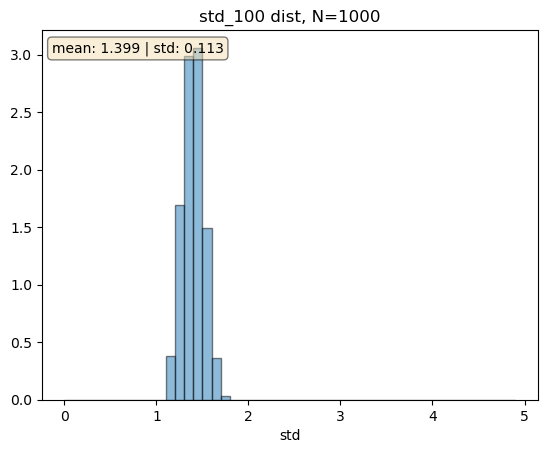

In [102]:
def Poisson_clt(N, M):
    mu_5s = np.zeros(N)
    std_5s = np.zeros(N)
    for i in range(N):
        sample = scipy.stats.poisson.rvs(2, size=M)
        mu_5s[i] = np.mean(sample)
        std_5s[i] = np.std(sample)
    
    plot.hist(mu_5s,density=True,edgecolor='black',alpha=.5,bins=np.arange(0,5,.1)) 
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax = plot.gca()
    mu_mean = round(mu_5s.mean(),3)
    mu_std = round(mu_5s.std(),3)
    box_contents = f'mean: {mu_mean} | std: {mu_std}'
    plot.text(0.02,.97, box_contents, ha='left', va='top', transform=ax.transAxes, bbox=props)
    plot.title(f'mu_{M} dist, N={N}')
    plot.xlabel("mu")
    plot.show()

    plot.hist(std_5s,density=True,edgecolor='black',alpha=.5,bins=np.arange(0,5,.1))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax = plot.gca()
    std_mean = round(std_5s.mean(),3)
    std_std = round(std_5s.std(),3)
    box_contents = f'mean: {std_mean} | std: {std_std}'
    plot.text(0.02,.97, box_contents, ha='left', va='top', transform=ax.transAxes, bbox=props)
    plot.title(f'std_{M} dist, N={N}')
    plot.xlabel("std")
    plot.show()

Poisson_clt(10, 5)
Poisson_clt(100, 5)
Poisson_clt(1000, 5)

Poisson_clt(1000, 100)

mu_5 and sigma_5 do appear to approach normal distributions as N grows. However, their variance doesn't seem to vary with N.
The variance of mu_5 and sigma_5 does appear to decrease as M decreases, which does intuitively makes sense.